<a href="https://colab.research.google.com/github/benmsanderson/scenariopca/blob/main/pyam_scenario_PCA_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Stuff

In [ ]:
!git clone https://github.com/znicholls/pyam.git

Cloning into 'pyam'...
remote: Enumerating objects: 6010, done.
remote: Total 6010 (delta 0), reused 0 (delta 0), pack-reused 6010
Receiving objects: 100% (6010/6010), 64.43 MiB | 21.85 MiB/s, done.
Resolving deltas: 100% (4132/4132), done.


In [ ]:
import os

path = "pyam"

# Check current working directory.
retval = os.getcwd()

# Now change the directory
os.chdir( path )

In [ ]:
!git checkout 'read-ar6'

Branch 'read-ar6' set up to track remote branch 'read-ar6' from 'origin'.
Switched to a new branch 'read-ar6'


In [ ]:
pip install --editable .[tests,optional_io_formats,tutorials]

Obtaining file:///content/pyam
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 6.2 MB/s eta 0:00:00
  Using cached setuptools_scm-8.0.4-py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━

In [ ]:
#!pip install -q pyam-iamc
!pip install -q unfccc-di-api
!pip install eofs
!pip install corner
!pip install fsspec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
#pyam = __import__("pyam-iamc")
import pyam as pyam
#import src.pyam_iamc as pyam
#import fsspec
import pkg_resources
#pkg_resources.require("Pandas==1.0.5")
import unfccc_di_api

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re
import sys
from eofs.multivariate.standard import MultivariateEof
import corner as corner


<IPython.core.display.Javascript object>

#Connect to IAM database

In [ ]:


conn = pyam.iiasa.Connection()
conn.valid_connections


INFO:pyam.iiasa:You are connected as an anonymous user


['ngfs_phase_3',
 'iamc15',
 'openentrance',
 'integration-test',
 'cdlinks',
 'india_scenario_hub',
 'genie',
 'hotspots',
 'commit',
 'kopernikus_public',
 'nexus-basins',
 'ngfs_phase_4',
 'senses',
 'aqnea',
 'navigate',
 'climate_solutions',
 'eu-climate-advisory-board',
 'engage',
 'nca5',
 'ar6-public',
 'deeds',
 'ngfs_phase_2',
 'gei',
 'netzero2040',
 'ripples',
 'ssp',
 'ecemf',
 'set_nav',
 'cmin',
 'ariadne',
 'paris_lttg']

In [ ]:
conn = pyam.iiasa.Connection('ar6-public')

In [ ]:
conn.scenarios()

0                                1
1                EN_INDCi2030_1000
2                EN_INDCi2030_500f
3                EN_INDCi2030_600f
4                EN_INDCi2030_700f
                   ...            
1384              SSP2_SPA2_19I_RE
1385       Directed Transition 1.0
1386                     2C-hybrid
1387    DISCRATE_cb600_cdrall_dr4p
1388                      SSP2_5.0
Name: scenario, Length: 1389, dtype: object

In [ ]:
conn.regions().head()

0                    World
1    Sao Tome and Principe
2             Turkmenistan
3             Saint Helena
4                Lithuania
Name: region, dtype: object

#Query database

Search for fields

In [ ]:
 #pd.set_option('display.max_colwidth', -1)
 vars=conn.variables()



In [ ]:
vars[vars.str.contains("Temperature") & vars.str.contains("MAGICC") & vars.str.contains("50")].to_list()

['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']

Construct Dataframe

In [ ]:

df = conn.query(
    model='*',
    variable=['Carbon Sequestration|Land Use','Carbon Sequestration|CCS','Primary Energy|Nuclear', 'Primary Energy|Oil','Primary Energy|Gas','Primary Energy|Fossil','Primary Energy|Coal','Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|AFOLU','Emissions|CH4','Emissions|N2O','Primary Energy|Non-Biomass Renewables','Primary Energy|Biomass','Final Energy','AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'],
    region='World'
)

vs = [element.split('|')[-1:][0] for element in df.variable]
shv = {vs[i]: df.variable[i] for i in range(len(vs))}


In [ ]:
df.meta

version Regional_scope  \
model                 scenario                                               
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100            5.0         Global   
                      ADVANCE_2020_Med2C                4.0         Global   
                      ADVANCE_2020_WB2C                 4.0         Global   
                      ADVANCE_2030_Med2C                4.0         Global   
                      ADVANCE_2030_Price1.5C            4.0         Global   
...                                                     ...            ...   
GCAM 5.3              NGFS2_Below 2?C                   NaN            NaN   
MESSAGEix-GLOBIOM_1.1 NGFS2_Below 2?C                   NaN            NaN   
REMIND-MAgPIE 2.1-4.2 NGFS2_Below 2?C                   NaN            NaN   
                      NGFS2_Below 2?C - IPD-95th        NaN            NaN   
                      NGFS2_Below 2?C - IPD-median      NaN            NaN   

                                                          Category  \
model                 scenario                                       
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100        failed-vetting   
                      ADVANCE_2020_Med2C            failed-vetting   
                      ADVANCE_2020_WB2C             failed-vetting   
                      ADVANCE_2030_Med2C            failed-vetting   
                      ADVANCE_2030_Price1.5C        failed-vetting   
...                                                            ...   
GCAM 5.3              NGFS2_Below 2?C                          NaN   
MESSAGEix-GLOBIOM_1.1 NGFS2_Below 2?C                          NaN   
REMIND-MAgPIE 2.1-4.2 NGFS2_Below 2?C                          NaN   
                      NGFS2_Below 2?C - IPD-95th               NaN   
                      NGFS2_Below 2?C - IPD-median             NaN   

                                                     Category_name  \
model                 scenario                                       
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100        failed-vetting   
                      ADVANCE_2020_Med2C            failed-vetting   
                      ADVANCE_2020_WB2C             failed-vetting   
                      ADVANCE_2030_Med2C            failed-vetting   
                      ADVANCE_2030_Price1.5C        failed-vetting   
...                                                            ...   
GCAM 5.3              NGFS2_Below 2?C                          NaN   
MESSAGEix-GLOBIOM_1.1 NGFS2_Below 2?C                          NaN   
REMIND-MAgPIE 2.1-4.2 NGFS2_Below 2?C                          NaN   
                      NGFS2_Below 2?C - IPD-95th               NaN   
                      NGFS2_Below 2?C - IPD-median             NaN   

                                                    CO2 emissions reductions 2019-2020 % modelled Native  \
model                 scenario                                                                             
AIM/CGE 2.0           ADVANCE_2020_1.5C-2100                                                -1.215971      
                      ADVANCE_2020_Med2C                                                    -1.236740      
                      ADVANCE_2020_WB2C                                                     -1.236740      
                      ADVANCE_2030_Med2C                                                    -1.248593      
                      ADVANCE_2030_Price1.5C                                                -1.287815      
...                                                                                               ...      
GCAM 5.3              NGFS2_Below 2?C                                                             NaN      
MESSAGEix-GLOBIOM_1.1 NGFS2_Below 2?C                                                             NaN      
REMIND-MAgPIE 2.1-4.2 NGFS2_Below 2?C                                                             NaN      
                      NGFS2

In [ ]:
years=np.arange(2010,2110,10)

#Define functions

Pivot table

In [ ]:
def pivtab(x,catg='*'):
  tb={}
  itmp=[]

  for vrb in vs:
    print(vrb)
    filtb=x.filter(variable=shv[vrb],Category=catg).data
    unt=filtb.unit.unique()

    tmp=pd.pivot_table(filtb,index=['model','scenario'],columns='year',values=['value'])['value'][years]
    unt=unt[0][:]
    tb[vrb]=tmp
    tb[vrb].unit=unt
    itmp.append(tmp.index)
  ii=tb[list(tb)[0]].index
  for ij,vrb in enumerate(vs):
    ii=ii.intersection(itmp[ij])
  for vrb in vs:
    unt=tb[vrb].unit
    tb[vrb]=tb[vrb].loc[ii]
    tb[vrb].unit=unt
    tb[vrb].name=shv[vrb]
  return tb

In [ ]:
df.meta.Category.unique()

array(['failed-vetting', 'C3', 'C5', 'C6', 'C7', 'C4', 'C1',
       'no-climate-assessment', 'C2', 'C8', nan], dtype=object)

Simple plots


In [ ]:
def plt2d(x,y,t1=2050,t2=2050):
  if len(sys.argv) > 3:
    t2 = sys.argv[3]
  else:
    t2=t1
  p1=plt.scatter(tb[x][t1],tb[y][t2])
  plt.ylabel(shv[x]+' '+tb[x].unit)
  plt.xlabel(shv[y]+' '+tb[y].unit)
  plt.title(x+' '+str(t1)+' vs '+y+' '+ str(t2))
  return p1

In [ ]:
def plt1d(x):
  p1=tb[x].T.plot(legend=False,color='lightgrey')
  tb[x].mean().plot(legend=False,color='k')
  plt.ylabel(shv[x]+' '+tb[x].unit)
  return p1


In [ ]:
def getrun(x):
  dsamp=[]
  for i,ky in enumerate(kys):
    dsamp.append(tb[ky].iloc[[x]])
  dfrun = pd.concat(dsamp, ignore_index=False)
  dfrun.insert(0, "Variable", kys, True)
  dfrun.reset_index(drop=True, inplace=True)
  dfrun=dfrun.set_index(['Variable'])
  return dfrun

In [ ]:
fields=['CCS','Oil','Coal','Gas','Land Use','CH4','AFOLU','Energy and Industrial Processes','N2O','Final Energy','Biomass','Non-Biomass Renewables','Nuclear','50.0th Percentile']


In [ ]:
def contains_multiple_words(s):
  return len(s.split()) > 1
fld_shrt=[]
for i,f in enumerate(fields):
  if shv[f].split('|')[0:][0]=='Emissions':
    dm='em_'
  else:
    dm=''
  if contains_multiple_words(f):
    fld_shrt.append(dm+''.join([x[0].upper() for x in f.split(' ')]))
  else:
    fld_shrt.append(dm+f)
fld_shrt

['CCS',
 'Oil',
 'Coal',
 'Gas',
 'LU',
 'em_CH4',
 'em_AFOLU',
 'em_EAIP',
 'em_N2O',
 'FE',
 'Biomass',
 'NR',
 'Nuclear',
 '5P']

#Get data for low overshoot scenarios

In [ ]:
df.head

<bound method IamDataFrame.head of <class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (90)
 * scenario : 1, 1.5C, 1.5C A, 1.5C B, 1.5C C, ... peak2025_DemandLow_FossilLow_TechHigh (877)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (15)
   unit     : EJ/yr, K, Mt CH4/yr, Mt CO2/yr, kt N2O/yr (5)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   version (float64) 5.0, 4.0, 3.0, 2.0, 1.0, 6.0, nan (7)
   Regional_scope (object) Global, nan, Global-sectoral, ... National (5)
   Category (object) failed-vetting, C3, C5, C6, C7, C4, C1, ... nan (11)
   Category_name (object) failed-vetting, ... nan (11)
   CO2 emissions reductions 2019-2020 % modelled Native (float64) ... (1011)
   ...>

In [ ]:
cls=[['C1','C2','C3'],['C1','C2']]

fld=[['CCS','Oil'],['CCS','Oil']]

In [ ]:
def make_eof_in(df,cl,fl,fld_scl):
  tb=pivtab(df,[x for x in cl])
  kys=list(tb.keys())
  fld_scl=[100,1,1,1,100,1,100,100,100,1,1,1,1]
  eof_in=[]
  for i,f in enumerate(fields):
    eof_in.append(tb[f].to_numpy()/fld_scl[i])

In [ ]:
 tb=pivtab(df,[x for x in ['C1','C2','C3','C4','C5','C6','C7','C8']])


50.0th Percentile
CCS
Land Use
CH4
AFOLU
Energy and Industrial Processes
N2O
Final Energy
Biomass
Coal
Fossil
Gas
Non-Biomass Renewables
Nuclear
Oil


Sanity plots for some sector timeseries

In [ ]:
kys=list(tb.keys())

#MultiVariate EOF - energy sectors


In [ ]:
#define normalisation of fields for PCA
fld_scl=[100,1,1,1,100,1,100,100,100,1,1,1,1,1]
eof_in=[]
for i,f in enumerate(fields):
  eof_in.append(tb[f].to_numpy()/fld_scl[i])



Make short titles for plots

#solve for EOFs

In [ ]:
solver = MultivariateEof(eof_in, center=True)

In [ ]:
fcdr=np.sign(solver.eofs()[0][:,5])

Plot first n EOFs for each component in multi-variate set

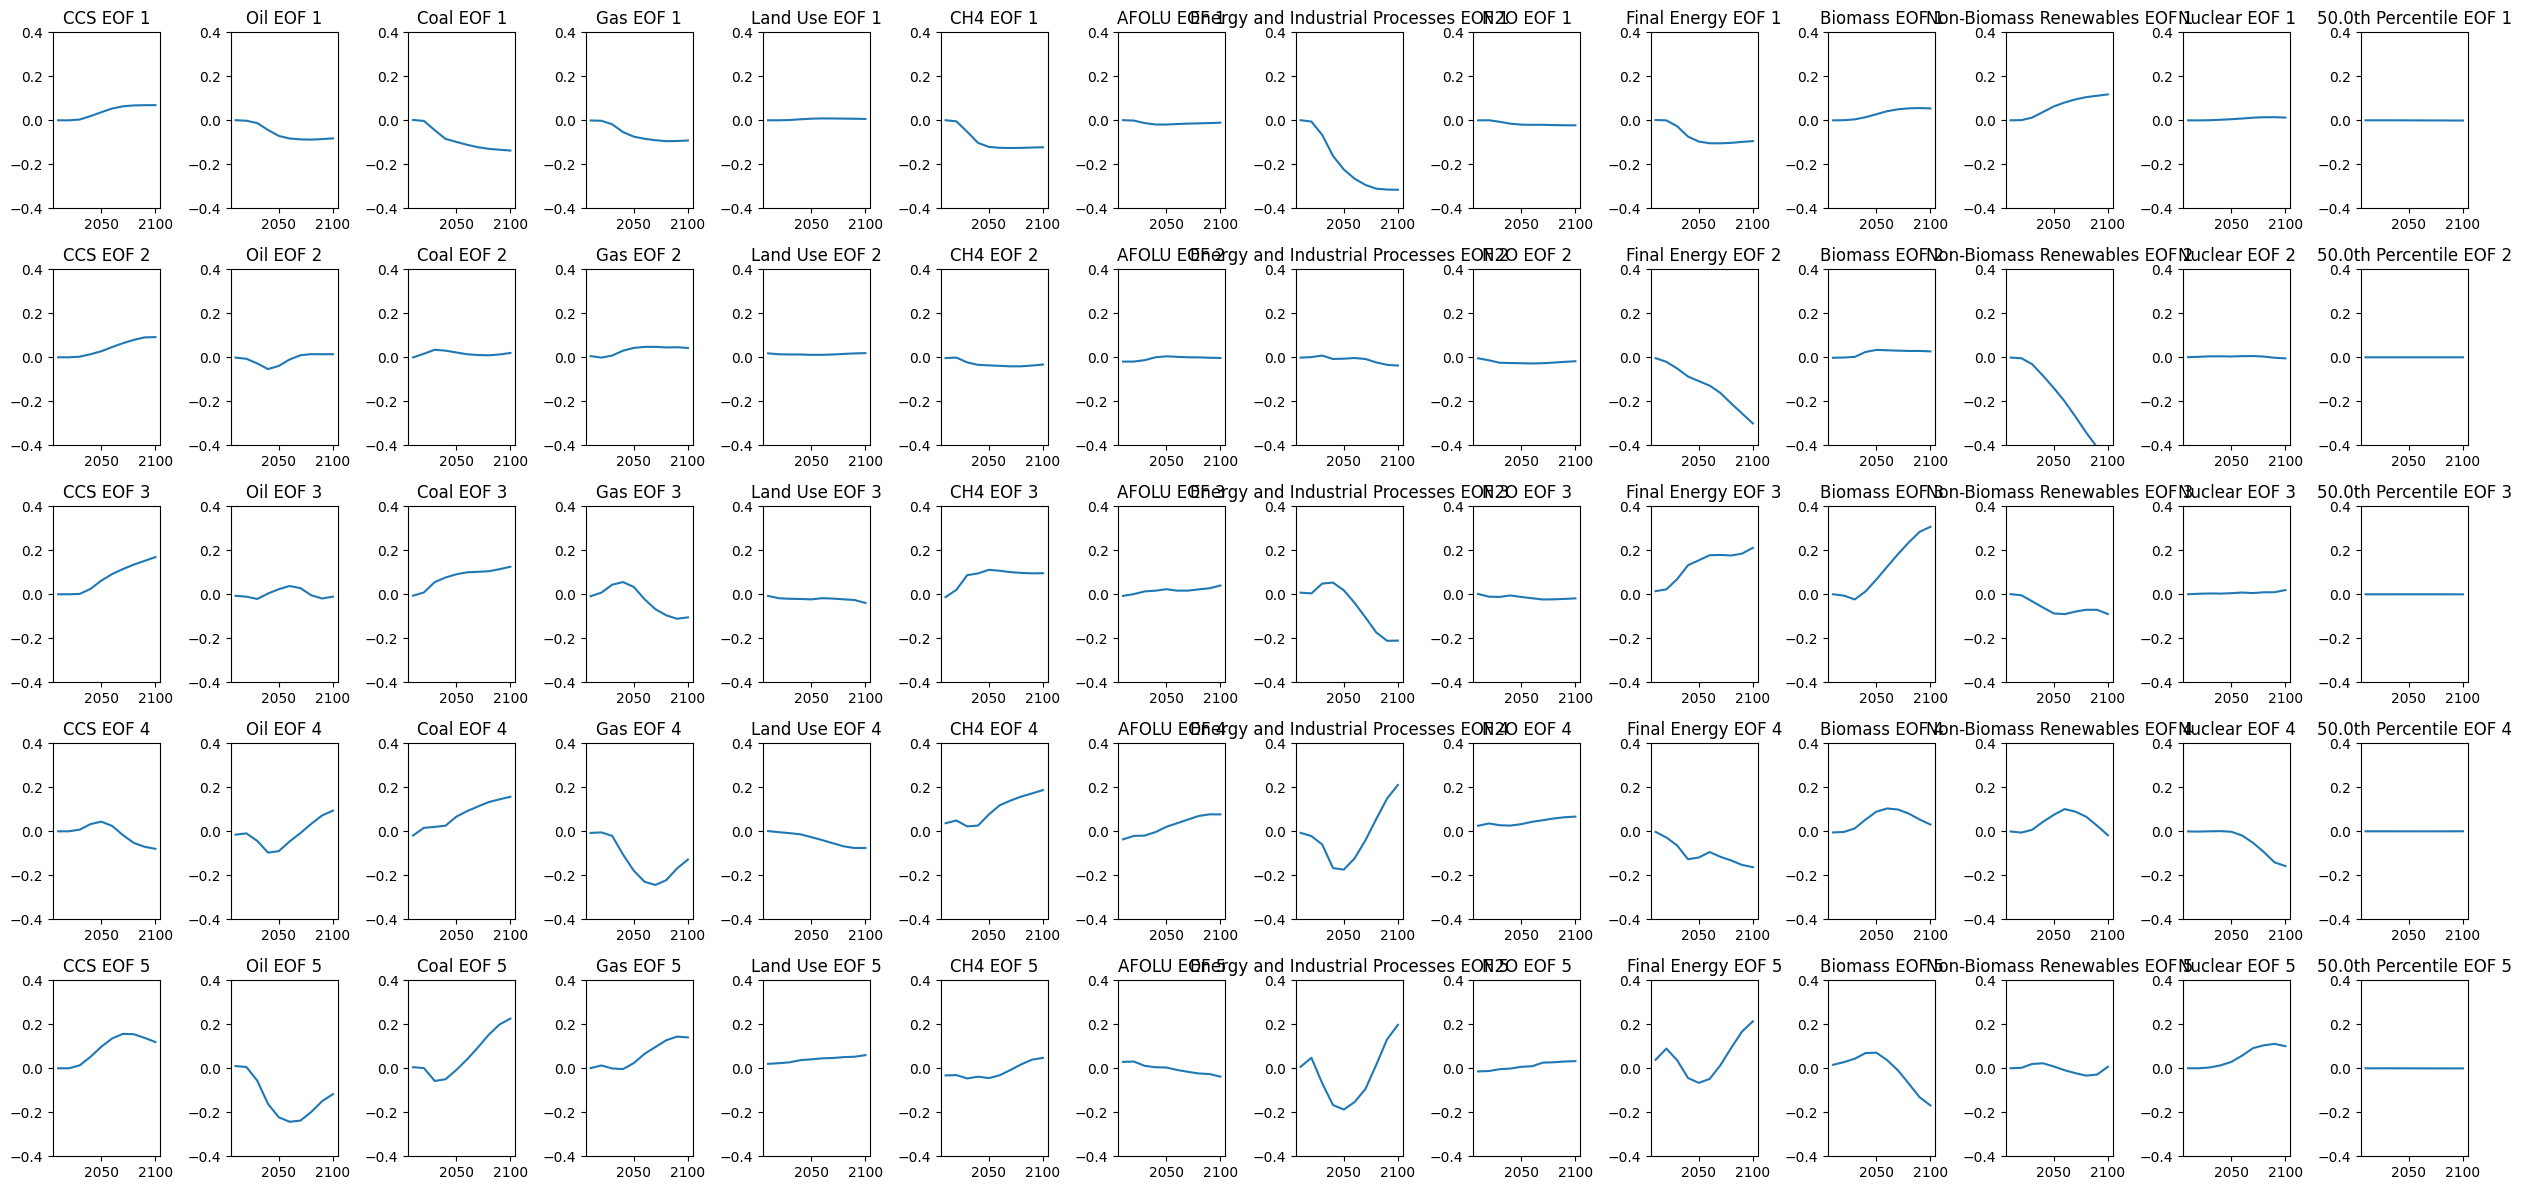

In [ ]:

fig, ax = plt.subplots(nrows=5, ncols=len(fld_scl),figsize=(25,12))
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        col.plot(years,fcdr[i]*solver.eofs()[j][i,:])
        col.set_title(fields[j]+' EOF '+str(i+1))
        col.set_ylim(-0.4,0.4)
fig.tight_layout()

Pair plot to show distribution of scenarios in EOF space

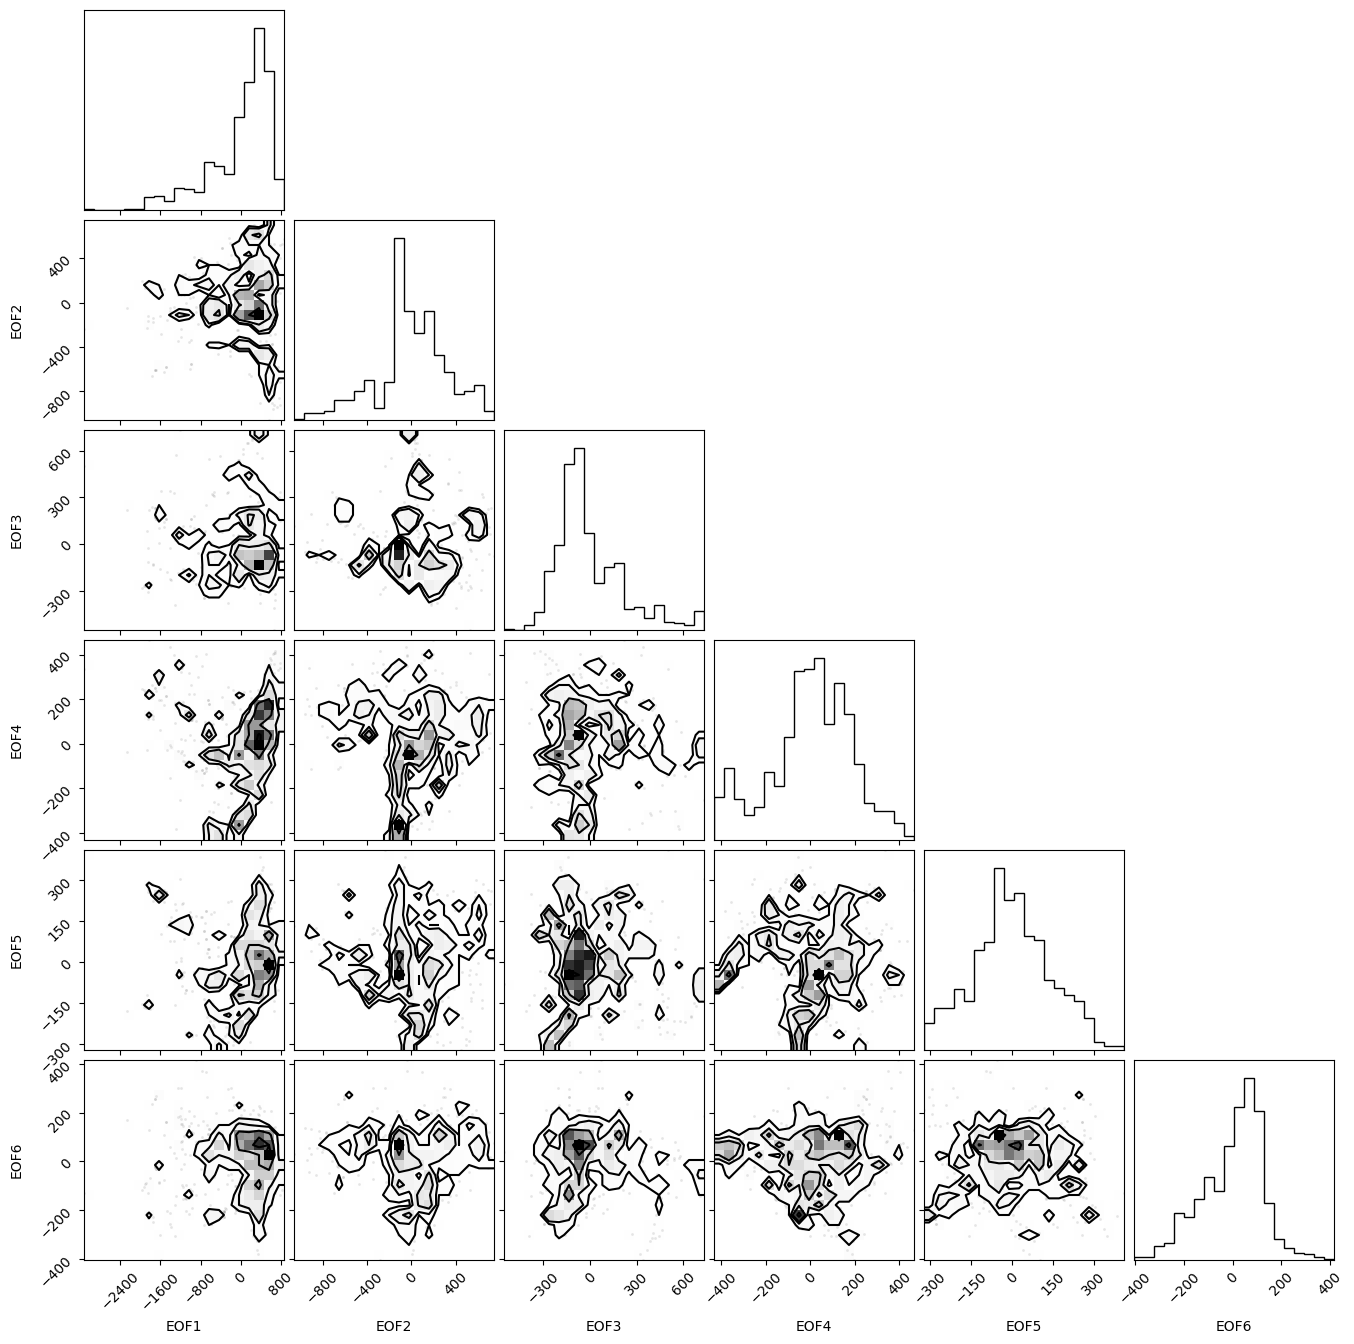

In [ ]:
pcs=np.matmul(solver.pcs(npcs=6),np.diag(fcdr[0:6]))
figure = corner.corner(pcs,labels=["EOF1","EOF2","EOF3","EOF4","EOF5","EOF6"],hist2d_kwargs={"plot_datapoints": True,"plot_density": False, "plot_contours":False})

Plot scenario timeseries, colored according to whether they are high/low in each EOF

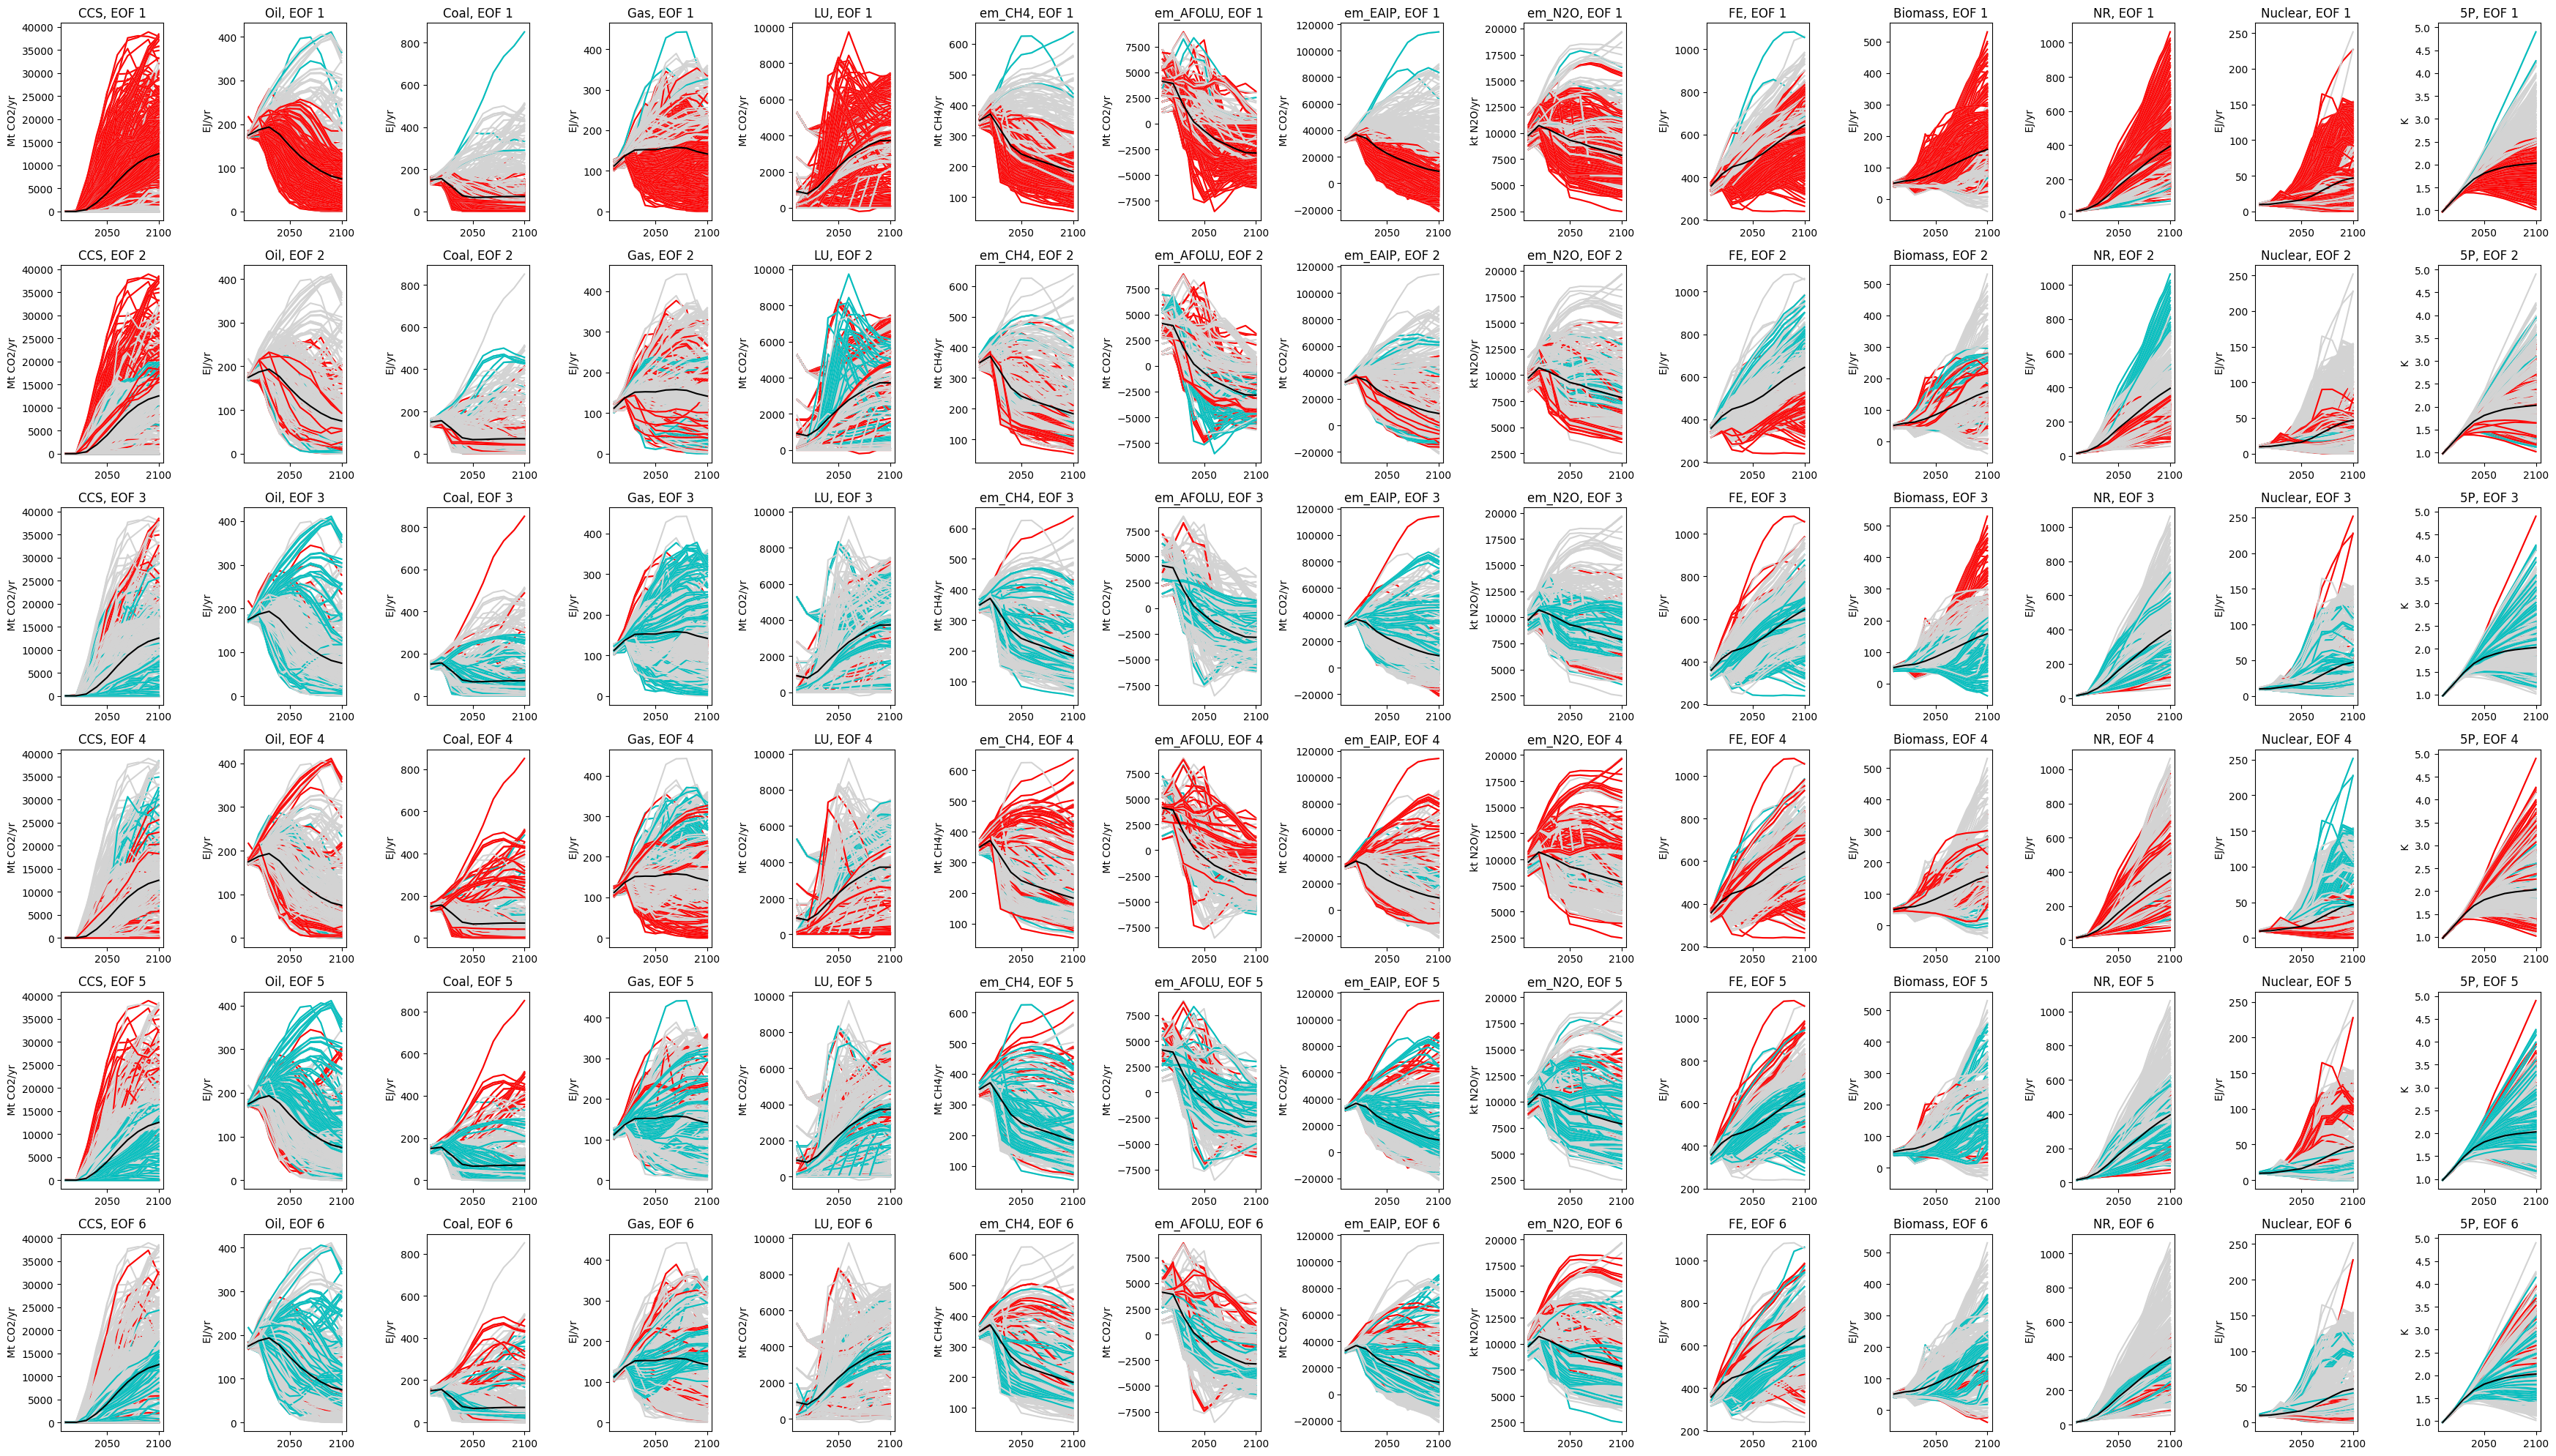

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=len(fld_scl),figsize=(35,20))
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        for k in range(tb[fields[j]].T.shape[1]):
          x=pcs[:,i]
          nx = (x-min(x))/(max(x)-min(x))
        #col.plot(years,tb[fields[j]].iloc[k],color=[np.square(nx[k]),np.square((1-nx[k])),np.square((1-nx[k]))])
          col.plot(years,tb[fields[j]].iloc[k],color='lightgrey')
          if nx[k]>0.7:
            col.plot(years,tb[fields[j]].iloc[k],color='r')
          if nx[k]<0.3:
            col.plot(years,tb[fields[j]].iloc[k],color='c')
        col.plot(years,tb[fields[j]].mean(),color='k')
        col.set_ylabel(' '+tb[fields[j]].unit)
        col.set_title(fld_shrt[j]+', EOF '+str(i+1))
fig.tight_layout()








empirical descriptions for each EOF

In [ ]:
solver.eofs(neofs=6)[0].shape

(6, 10)

In [ ]:
trunc=20

In [ ]:
from scipy.stats.qmc import LatinHypercube
from scipy.stats.qmc import scale

In [ ]:
sampler = LatinHypercube(d=trunc)
sample = sampler.random(n=10000)

In [ ]:
l_bounds = np.min(np.matmul(solver.pcs(npcs=trunc),np.diag(fcdr[0:trunc])),0)
u_bounds = np.max(np.matmul(solver.pcs(npcs=trunc),np.diag(fcdr[0:trunc])),0)
sample_scaled = scale(sample, l_bounds, u_bounds)

(array([  1.,   0.,   2.,  25.,  29.,  37.,  86., 121., 291., 160.]),
 array([-3120.41570142, -2722.31397776, -2324.21225409, -1926.11053043,
        -1528.00880677, -1129.90708311,  -731.80535945,  -333.70363579,
           64.39808787,   462.49981153,   860.6015352 ]),
 <BarContainer object of 10 artists>)

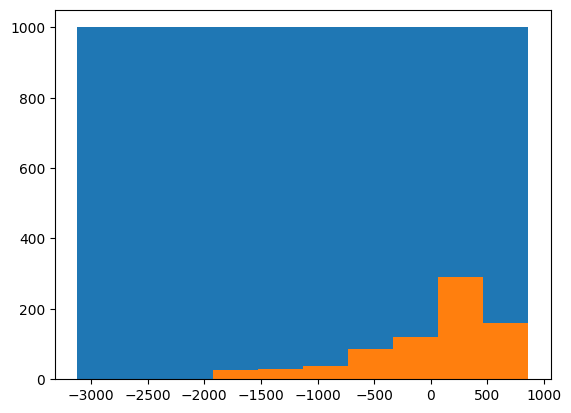

In [ ]:
plt.hist(sample_scaled[:,0])
plt.hist(np.matmul(solver.pcs(npcs=trunc),np.diag(fcdr[0:trunc]))[:,0])

In [ ]:
recon_org=np.matmul(np.matmul(solver.pcs(npcs=trunc),np.diag(fcdr[0:trunc])),solver.eofs(neofs=trunc))
recon=np.matmul(sample_scaled,solver.eofs(neofs=trunc))


In [ ]:
sample_scaled.shape[0]

10000

In [ ]:
inrng=np.zeros((sample_scaled.shape[0],len(eof_in)))
for i,f in enumerate(fields):
  inrng[:,i]=np.sum(((recon[i,:,:]+np.mean(eof_in[i][:,:].T,1)[None,:])-np.min(eof_in[i][:,:].T,1)[None,:])<0,1)+np.sum(((recon[i,:,:]+np.mean(eof_in[i][:,:].T,1)[None,:])-np.max(eof_in[i][:,:].T,1)[None,:])>0,1)>0



In [ ]:
nngflds=[0,1,2,3,5,8,9,11,12]

nngflds=[True,True,True,True,False,True,False,False,True,True,False,True,True,False]
isng=np.zeros((sample_scaled.shape[0],len(eof_in)))
for i,f in enumerate(fields):
  if nngflds[i]:
    isng[:,i]=np.sum((recon[i,:,:]+np.mean(eof_in[i][:,:].T,1)[None,:])<0,1)>0
  else:
    isng[:,i]=0


In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
ax=ax.flatten()

for i,f in enumerate(fields):
  ax[i].plot(eof_in[i][:,:].T,'r')
  ax[i].plot((recon[i,np.sum(isng,1)==0,:]+np.mean(eof_in[i][:,:].T,1)[None,:]).T,'k',alpha=.2)
  ax[i].plot((recon_org[i,:,:]+np.mean(eof_in[i][:,:].T,1)[None,:]).T,'g',alpha=.2)

  #ax[i].plot((recon[i,np.abs((recon[-1,:,:]+np.mean(eof_in[-1][:,:].T,1)[None,:])[:,-1]-1.5)<0.05,:]+np.mean(eof_in[i][:,:].T,1)[None,:]).T,'g',alpha=.2)
  ax[i].set_title(f)
0


In [ ]:
is15=np.abs((recon[-1,:,:]+np.mean(eof_in[-1][:,:].T,1)[None,:])[:,-1]-1.5)<0.05
plt.plot(recon[0,is15,-1]+np.mean(eof_in[0][-1,:].T),recon[3,is15,-1]+np.mean(eof_in[3][-1,:].T),'.')

In [ ]:
np.abs((recon[-1,:,:]+np.mean(eof_in[-1][:,:].T,1)[None,:])[:,-1]-1.5)<0.05

In [ ]:
EOF_desc=['Low Demand','Rapid CCS, high Nat. gas','Rapid CCS & Oil','Decrease coal & mitigate SLCF','Short term low demand','Rapid oil phaseout']

In [ ]:
from itertools import groupby,islice
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)
def add_line1(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + 1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]
    #return [(k, sum(1 for i in g)) for k,g in zip(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        if level==1:
          for label in df.index.get_level_values(level):
            lxpos = (pos + 1)*scale
            ax.text(lxpos, ypos, label, ha='right', va='top' ,transform=ax.transAxes,rotation='vertical')
            add_line(ax, pos*scale, ypos)
            pos += 1
        else:
          for label, rpos in label_len(df.index,level):
            lxpos = (pos + 0.5 * rpos + 0.5)*scale
            ax.text(lxpos, ypos, label, ha='right', va='top' ,transform=ax.transAxes,rotation=30)
            add_line1(ax, pos*scale, ypos)
            pos += rpos
        add_line1(ax, pos*scale , ypos)
        ypos -= 1

In [ ]:
plt.figure(figsize=(15,3))

cmap = plt.cm.get_cmap("bwr",7)
plt.pcolor(pcs.T, cmap=cmap)
ax=plt.gca()
ax.set_yticks(np.arange(0.5,6))
ax.set_yticklabels(EOF_desc)
ax.set_xticklabels('')
ax.set_xlabel('')
label_group_bar_table(ax, tb['CCS'])
cb=plt.colorbar()
cb.set_ticks([-300,-200,-100,0,100,200,300])
cb.set_ticklabels(['Strong -ve','Moderate -ve','Weak -ve','Neutral','Weak +ve','Moderate +ve','Strong +ve'])